In [4]:
!pip install tensorly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorly as tl

In [6]:
loader = loadmat('Yale_64x64.mat')
data = loader['fea']

In [7]:
data = data.reshape(15, 11, 64, 64).transpose(3, 2, 1, 0)

In [8]:
def visualize(A):

    plt.matshow(A, cmap='gray')
    plt.show()

def unfold(n, T):

    s = T.shape
    if n == 0:
        return T.reshape(s[0], s[1]*s[2])
    elif n == 1:
        return T.transpose(1, 2, 0).reshape(s[1], s[0]*s[2])
    else:
        return T.transpose(2, 0, 1).reshape(s[2], s[0]*s[1])

In [9]:
decomposed = tl.decomposition.TensorTrain(rank=50).fit_transform(data)

In [10]:
for i in decomposed:
  print(i.shape)

(1, 64, 50)
(50, 64, 50)
(50, 11, 15)
(15, 15, 1)


In [11]:
G0 = np.squeeze(decomposed[0])
G1 = decomposed[1]
G2 = decomposed[2]
G3 = np.squeeze(decomposed[3])

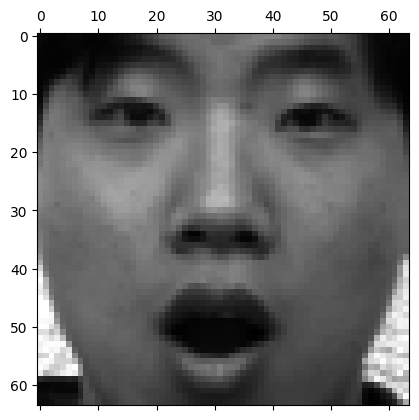

In [12]:
visualize(data[:, :, 1, 3])

In [13]:
G01 = np.tensordot(G0, G1, axes=([1], [0]))

In [14]:
C = np.tensordot(G01, (G2[:, 1, :]), axes = ([2], [0]))

In [15]:
kompr = np.tensordot(C, G3[:, 3], axes=([2], [0]))

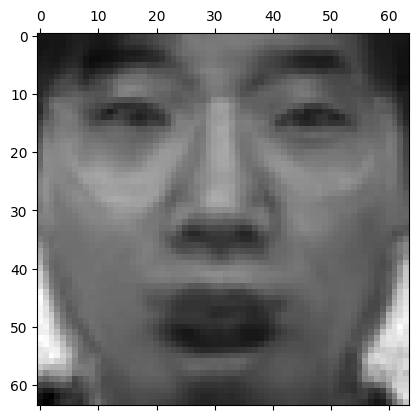

In [16]:
visualize(kompr)

171675 vrijednosti umjesto 675840 odnosno rekonstrukcija koristi samo 25% originalne memorije.

In [17]:
def pronadi(slika: np.ndarray) -> tuple:

  z = slika.flatten()
  mn = np.inf
  esol = 0
  psol = 0
  err = np.zeros((11, 15))

  for e in range(11):
    Ce = np.tensordot(G01, (G2[:, e, :]), axes = ([2], [0])).reshape(64*64, 15)
    a = np.linalg.lstsq(Ce, z, rcond=None)[0]
    for p in range(15):
      dtt = np.linalg.norm(a - G3[:, p])
      err[e, p] = dtt
      if dtt < mn:
        mn = dtt
        psol = p
        esol = e
  return esol, psol, err

1 3


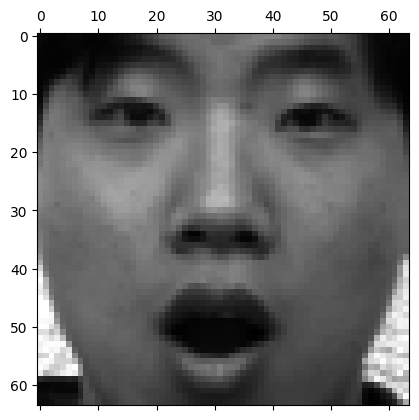

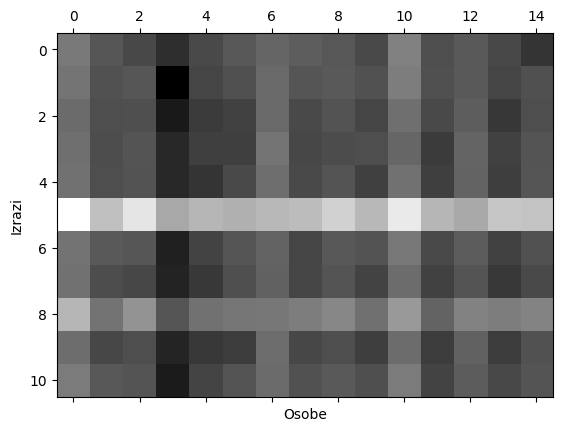

In [22]:
e, p, err= pronadi(data[:, :, 1, 3])
print(e, p)
visualize(data[:, :, e, p])
fig, ax = plt.subplots()
ax.set_xlabel("Osobe")
ax.set_ylabel("Izrazi")
ax.matshow(err, cmap='gray')